In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
softmin = torch.nn.Softmin(dim=0)
softmax = torch.nn.Softmax(dim=0)
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)

In [15]:
p11 = torch.tensor([0., 0.2, 0.1, 1.])
p12 = p11 + torch.normal(torch.zeros_like(p11), 0.00001)

p21 = torch.tensor([1., 0.45, 0.2, 3.])
p22 = p21 + torch.normal(torch.zeros_like(p21), 1.)

print(p11)
print(p12)
print('\n')
print(p21)
print(p22)
print('\n')

print(cos(p11, p12))
print(cos(p21, p22))
print('\n')

print(softmin(torch.tensor([cos(p11, p12), cos(p21, p22)])))

tensor([0.0000, 0.2000, 0.1000, 1.0000])
tensor([-7.8201e-06,  1.9999e-01,  1.0001e-01,  1.0000e+00])


tensor([1.0000, 0.4500, 0.2000, 3.0000])
tensor([0.2972, 1.6220, 0.9441, 3.6569])


tensor(1.0000)
tensor(0.9240)


tensor([0.4810, 0.5190])


In [3]:
class PrototypeLayer(torch.nn.Module):
    def __init__(self, input_dim=5, n_prototype_vectors=2, n_prototype_groups=2, device="cpu"):
        super(PrototypeLayer, self).__init__()
        self.n_prototype_groups = n_prototype_groups
        self.n_prototype_vectors = n_prototype_vectors
        self.device = device
#         self.prototype_vectors = torch.nn.Parameter(torch.rand(n_prototype_groups, n_prototype_vectors, input_dim,
#                                                                device=self.device, requires_grad=True))
#         nn.init.xavier_uniform_(self.prototype_vectors, gain=1.0)

#         self.prototype_vectors = torch.nn.Parameter(torch.tensor([[[1., 0., 1.], [0.5, 2., 0.1]],
#                                                                   [[0.3, 0.2, 0.3], [0.4, 0.21, 0.1]]],
#                                                                device=self.device, requires_grad=True))
        self.prototype_vectors = torch.nn.Parameter(torch.tensor([[[0.3, 0.2, 0.3], [0.4, 0.21, 0.1]],
                                                                  [[1., 0., 1.], [0.5, 2., 0.1]]],
                                                               device=self.device, requires_grad=True))

    def forward(self, x):
        pass

# model = PrototypeLayer()
# model.prototype_vectors

In [4]:
def list_of_distances(X, Y, norm='l2'):
    '''
    Given a list of vectors, X = [x_1, ..., x_n], and another list of vectors,
    Y = [y_1, ... , y_m], we return a list of vectors
            [[d(x_1, y_1), d(x_1, y_2), ... , d(x_1, y_m)],
             ...
             [d(x_n, y_1), d(x_n, y_2), ... , d(x_n, y_m)]],
    where the distance metric used is the sqared euclidean distance.
    The computation is achieved through a clever use of broadcasting.
    '''
    # XX = torch.reshape(list_of_norms(X), shape=(-1, 1))
    # YY = torch.reshape(list_of_norms(Y), shape=(1, -1))
    # output = XX + YY - 2 * torch.matmul(X, torch.transpose(Y))
    # return output
    
    XX = list_of_norms(X, norm=norm).view(-1, 1)
    YY = list_of_norms(Y, norm=norm).view(1, -1)
    return XX + YY - 2 * torch.matmul(X, torch.transpose(Y, 0, 1))


def list_of_norms(X, norm='l2'):
    '''
    X is a list of vectors X = [x_1, ..., x_n], we return
        [d(x_1, x_1), d(x_2, x_2), ... , d(x_n, x_n)], where the distance
    function is the squared euclidean distance.
    '''
    if norm == 'l2':
        return torch.sum(torch.pow(X, 2), axis=1)
    elif norm == 'l1':
        return torch.sum(torch.abs(X), axis=1)
    
    return None


def eucl_dist(x1, x2):
    return torch.sum(torch.pow(x1 - x2, 2))

def l1_norm(x1, x2):
    return torch.sum(torch.abs(x1 - x2))

Parameter containing:
tensor([[[0.3000, 0.2000, 0.3000],
         [0.4000, 0.2100, 0.1000]],

        [[1.0000, 0.0000, 1.0000],
         [0.5000, 2.0000, 0.1000]]], requires_grad=True)
Parameter containing:
tensor([[[ 0.3500,  0.2050,  0.2000],
         [ 0.3500,  0.2050,  0.2000]],

        [[ 1.6367, -0.6367,  1.6367],
         [-0.1367,  2.6367, -0.5367]]], requires_grad=True)


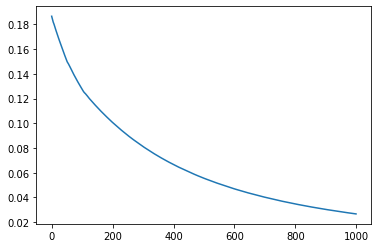

In [211]:
model = PrototypeLayer()
print(model.prototype_vectors)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

losses = []
for e in range(1000):
    
    tmp = torch.empty(2, device='cpu')
    for n_g in range(2):
#         tmp[n_g] = eucl_dist(model.prototype_vectors[n_g, 0], model.prototype_vectors[n_g, 1])
        tmp[n_g] = l1_norm(model.prototype_vectors[n_g, 0], model.prototype_vectors[n_g, 1])
    
    s = softmin(tmp)
                             
    loss = torch.abs(1 - torch.sum(torch.pow(s, 0.5)))
    
    losses.append(loss.item())
#     print(f"{tmp}")
#     print(f"{s}")
#     print(f"\nEpoch {e} Loss: {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print(model.prototype_vectors) 
plt.figure()
plt.plot(losses)
plt.show()

In [151]:
class tmp_model(nn.Module):
    def __init__(self, input_dim=5, n_prototype_vectors=2, n_prototype_groups=2, device="cpu"):
        super(tmp_model, self).__init__()
        self.x = torch.nn.Parameter(torch.tensor([0., 2.], requires_grad=True))

    def forward():
        pass
        
net = tmp_model()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

out = softmin(net.x)
print(out)
print(torch.abs(1 - torch.sum(torch.pow(out, 0.5))))

# for e in range(10):

# loss = torch.nn.MSELoss(out, torch.tensor([1., 0.]))
# print(loss)

tensor([0.8808, 0.1192], grad_fn=<SoftmaxBackward>)
tensor(0.2838, grad_fn=<AbsBackward>)


In [157]:
torch.abs(1 - torch.sum(torch.pow(softmin(torch.tensor([1.2949, 0.8567])), 0.5)))

tensor(0.4059)

In [16]:
torch.abs(1 - torch.sum(torch.pow(softmin(torch.tensor([.2949, 0.08567, 0.8])), 0.5)))

tensor(0.7143)

In [17]:
torch.abs(1 - torch.sum(torch.pow(softmin(torch.tensor([2.2949, 0.008567, 3.8])), 0.5)))

tensor(0.3855)